In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [40]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
X = df.drop(columns=['math score'], axis= 1)


In [43]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [44]:
y = df['math score']

In [45]:
#Create column transformer with 3 types of transformer
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer, cat_feature ),
        ('StandardScaler', numeric_transformer, num_feature)
    ]
)


In [46]:
X = preprocessor.fit_transform(X)

In [47]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [51]:
def evaluate_model(true, predict):
    mse = mean_squared_error(true, predict)
    mea = mean_absolute_error(true, predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mse, rmse, r2_score

In [52]:
models ={
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" :DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "Cat Boost Regressor" : CatBoostRegressor(),
    "AdaBoost Regressor" :AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate train and test dataset

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)



    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Model performance for training set")
    print(f"Root mean squred error {model_train_rmse}")
    print(f"Root mean Absolute error {model_train_mae}")
    print(f"R2 score {model_train_r2}")



    print('-----------------------')
    print("Model performance for test set")
    print(f"Root mean squred error {model_test_rmse}")
    print(f"Root mean Absolute error {model_test_mae}")
    print(f"R2 score {model_test_r2}")
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for training set
Root mean squred error 5.327359474652332
Root mean Absolute error 28.380758972167968
R2 score <function r2_score at 0x000002201985DE50>
-----------------------
Model performance for test set
Root mean squred error 5.40960336750764
Root mean Absolute error 29.26380859375
R2 score <function r2_score at 0x000002201985DE50>


Lasso
Model performance for training set
Root mean squred error 6.593815587795566
Root mean Absolute error 43.47840400585579
R2 score <function r2_score at 0x000002201985DE50>
-----------------------
Model performance for test set
Root mean squred error 6.51969453566742
Root mean Absolute error 42.50641683841162
R2 score <function r2_score at 0x000002201985DE50>


Ridge
Model performance for training set
Root mean squred error 5.323324922741654
Root mean Absolute error 28.33778823308244
R2 score <function r2_score at 0x000002201985DE50>
-----------------------
Model performance for test set
Root mean squred error 5.

In [57]:
pd.DataFrame(list(zip(model_list,r2_list)), columns= ['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending= False)

TypeError: '<' not supported between instances of 'function' and 'function'

In [56]:
len(model_list), len(r2_list)

(9, 9)

In [61]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) *100
print(f"Accuracy of the model {score}%")

Accuracy of the model 87.97402769404664%


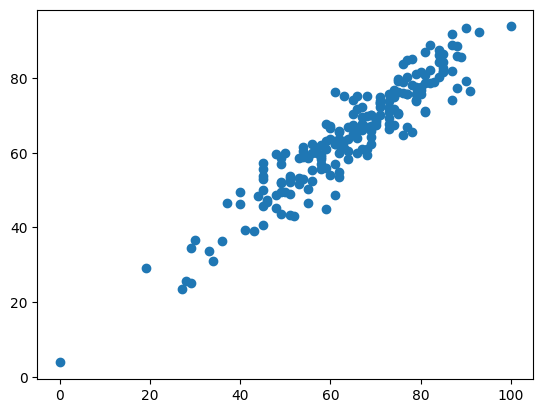

In [63]:
plt.scatter(y_test, y_pred)

<Axes: xlabel='math score'>

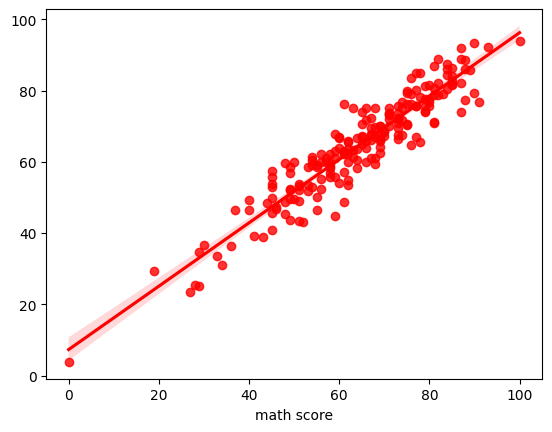

In [64]:
sns.regplot(x=y_test, y=y_pred, color='red')

Difference between actual and predicted values

In [65]:
pred_df = pd.DataFrame({'actual value':(y_test), 'predicted value':(y_pred), 'Difference':(y_test - y_pred)})
pred_df

,actual value,predicted value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125


In [67]:
diff = pred_df['Difference']

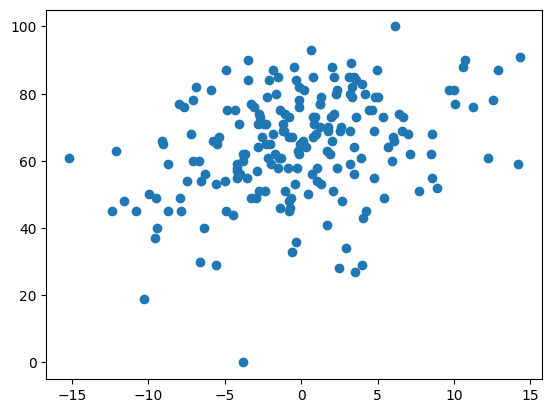

In [69]:
plt.scatter(diff, y_test)